#YOLOv8 NESNE TANIMA

##ORTAM HAZIRLIĞI

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

MessageError: Error: credential propagation was unsuccessful

In [ ]:
%pwd


In [ ]:
%cd /content/drive/MyDrive/YOLOv8/1_object_detection

In [ ]:
#ULTRALYTİCS İNDİR
%pip install ultralytics

import ultralytics
ultralytics.checks()

#TEST/PREDİCTİON

In [ ]:
!yolo detect predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 134k/134k [00:00<00:00, 6.80MB/s]
image 1/1 /content/drive/MyDrive/YOLOv8/1_object_detection/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 404.1ms
Speed: 23.1ms preprocess, 404.1ms inference, 33.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


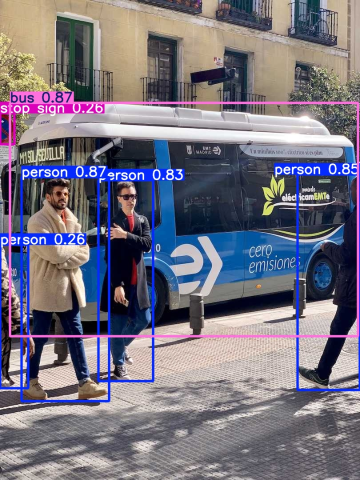

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img = cv2.imread("runs/detect/predict/bus.jpg")
img = imutils.resize(img, width=360)

cv2_imshow(img)

# PYTHON İLE VERİLERE ERİŞME VE DEĞİŞTİRME


0: 640x480 4 persons, 1 bus, 1 stop sign, 288.4ms
Speed: 3.6ms preprocess, 288.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


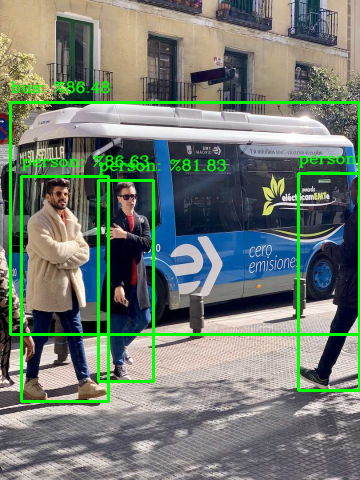

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_COMPLEX

img_path="bus.jpg"
model_path="yolov8n.pt"

model = YOLO(model_path)

img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

results = model(img)[0]

threshold = 0.5
for result in results.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = result
  x1 = int(x1)
  x2 = int(x2)
  y1 = int(y1)
  y2 = int(y2)
  class_id = int(class_id)
  #print(result)
  if score > threshold:
    cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2) #BURAYA İNT DEĞERLER GİRİLMESİ GEREKTİĞİ İÇİN YUKARIDA İNT DEĞERE DÖNDÜRME İŞLEMİ YAPTIK

    class_name = results.names[class_id]
    score = score*100
    text = f"{class_name}: %{score:.2f}"
    cv2.putText(img, text, (x1, y1-10), font, 0.5, (0,255,0), 1, cv2.LINE_AA  )


cv2_imshow(img)







#KENDİ DATAMIZI TRAİN ETME AŞAMASI

In [ ]:
!unzip data/brain_tumor_dataset.zip -d ./data

Archive:  data/brain_tumor_dataset.zip
   creating: ./data/brain_tumor_dataset/images/
   creating: ./data/brain_tumor_dataset/images/test/
  inflating: ./data/brain_tumor_dataset/images/test/104.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/113.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/125.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/13.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/132.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/14.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/146.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/152.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/162.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/170.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/181.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/185.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/2.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/208.jp

In [ ]:
!yolo detect train data=/content/drive/MyDrive/YOLOv8/1_object_detection/data/config.yaml model=yolov8n.pt epochs=25 imgsz=640 workers=8 batch=8 device=0 name=yolov8_brain_tumor_detection

Ultralytics YOLOv8.2.67 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/YOLOv8/1_object_detection/data/config.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_brain_tumor_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

#PREDİCT TAHMİN AŞAMASI

In [3]:
!yolo detect predict model=/content/drive/MyDrive/YOLOv8/1_object_detection/runs/detect/yolov8_brain_tumor_detection/weights/last.pt source=/content/drive/MyDrive/YOLOv8/1_object_detection/inference save=True

/bin/bash: line 1: yolo: command not found


In [ ]:
import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_COMPLEX

img_path="/content/drive/MyDrive/YOLOv8/1_object_detection/inference/113.jpg"
model_path="/content/drive/MyDrive/YOLOv8/1_object_detection/runs/detect/yolov8_brain_tumor_detection/weights/best.pt"

model = YOLO(model_path)

img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

results = model(img)[0]

threshold = 0.5
for result in results.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = result
  x1 = int(x1)
  x2 = int(x2)
  y1 = int(y1)
  y2 = int(y2)
  class_id = int(class_id)
  #print(result)
  if score > threshold:
    cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2) #BURAYA İNT DEĞERLER GİRİLMESİ GEREKTİĞİ İÇİN YUKARIDA İNT DEĞERE DÖNDÜRME İŞLEMİ YAPTIK

    class_name = results.names[class_id]
    score = score*100
    text = f"{class_name}: %{score:.2f}"
    cv2.putText(img, text, (x1, y1-10), font, 0.5, (0,255,0), 1, cv2.LINE_AA  )


cv2_imshow(img)

ModuleNotFoundError: No module named 'ultralytics'